### Objectifs de ce notebook : 

- Découvrir je jeu de données en réalisant une analyse exploratoire 
- Avoir une idée des données à garder pour réaliser la suite de l'étude 
- Tester des stratégies de prétraitement pour rendre un apprentissage possible

### Commentaires : 

Premier projet de data science jamais réalisé, beaucoup d'aspects à améliorer dans le code mais j'ai préféré le laisser tel quel

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
!pip install kmodes

In [3]:
from kmodes.kprototypes import KPrototypes

In [4]:
donnees = pd.read_csv('C:/Users/coren/python/pyproj/Projet Canada/CES19.csv', low_memory=False)


In [5]:
donnees.isna().sum()

Unnamed: 0                             0
cps19_StartDate                        0
cps19_EndDate                          0
cps19_ResponseId                       0
cps19_consent                          0
                                   ...  
pes19_inattentive                  27482
cps19_weight_general_all              89
cps19_weight_general_restricted     4000
pes19_weight_general_all           27497
pes19_weight_general_restricted    29523
Length: 621, dtype: int64

In [6]:
print(donnees.index)

RangeIndex(start=0, stop=37822, step=1)


In [7]:
print(donnees.columns)

Index(['Unnamed: 0', 'cps19_StartDate', 'cps19_EndDate', 'cps19_ResponseId',
       'cps19_consent', 'cps19_citizenship', 'cps19_yob', 'cps19_yob_2001_age',
       'cps19_gender', 'cps19_province',
       ...
       'split_vol_assoc', 'pes19_data_quality', 'pes19_panel', 'pes19_age',
       'pes19_duplicates_flag', 'pes19_inattentive',
       'cps19_weight_general_all', 'cps19_weight_general_restricted',
       'pes19_weight_general_all', 'pes19_weight_general_restricted'],
      dtype='object', length=621)


In [8]:
yob = donnees['cps19_yob']

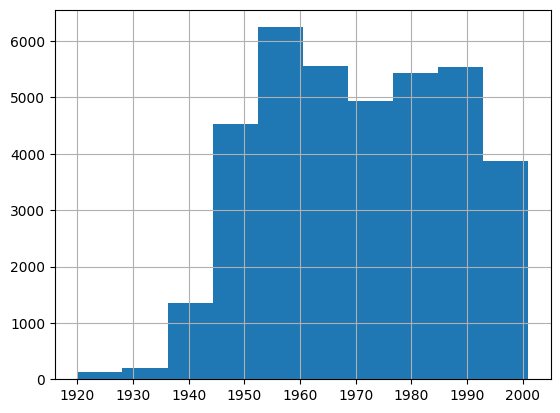

In [9]:
histoyob = yob.hist()

In [10]:
donnees.describe()

,Unnamed: 0,cps19_yob,cps19_yob_2001_age,cps19_interest_gen_1,cps19_interest_elxn_1,cps19_vote_unlike_pr_7_TEXT,cps19_vote_lean_pr_7_TEXT,cps19_party_rating_23,cps19_party_rating_24,cps19_party_rating_25,...,split_hatespeech,split_vol_assoc,pes19_data_quality,pes19_age,pes19_duplicates_flag,pes19_inattentive,cps19_weight_general_all,cps19_weight_general_restricted,pes19_weight_general_all,pes19_weight_general_restricted
count,37822.000000,37822.000000,293.0,35409.000000,35536.000000,0.0,0.0,35176.000000,35022.000000,33962.000000,...,10251.000000,10251.000000,10340.000000,10340.000000,10340.000000,10340.000000,37733.000000,33822.000000,10325.000000,8299.000000
mean,18911.500000,1970.308709,18.0,6.453077,7.087292,NaN,NaN,48.362491,43.611587,50.032860,...,0.504146,0.503073,2.731044,54.380754,0.022631,0.055222,1.001669,1.001635,1.001021,1.001167
std,10918.415277,16.611707,0.0,2.478729,2.475382,NaN,NaN,33.280149,33.949185,29.395139,...,0.500007,0.500015,5.563472,15.556598,0.148730,0.228425,0.549895,0.551240,0.845355,0.826845
min,1.000000,1920.000000,18.0,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,18.000000,0.000000,0.000000,0.200000,0.200000,0.200000,0.200000
25%,9456.250000,1957.000000,18.0,5.000000,6.000000,NaN,NaN,16.000000,10.000000,27.000000,...,0.000000,0.000000,0.000000,42.000000,0.000000,0.000000,0.644238,0.635656,0.437200,0.443264
50%,18911.500000,1970.000000,18.0,7.000000,8.000000,NaN,NaN,54.000000,41.000000,54.000000,...,1.000000,1.000000,0.000000,57.000000,0.000000,0.000000,0.838045,0.844196,0.743061,0.766621
75%,28366.750000,1984.000000,18.0,8.000000,9.000000,NaN,NaN,77.000000,74.000000,73.000000,...,1.000000,1.000000,0.000000,66.000000,0.000000,0.000000,1.200770,1.205593,1.216033,1.233630
max,37822.000000,2001.000000,18.0,10.000000,10.000000,NaN,NaN,100.000000,100.000000,100.000000,...,1.000000,1.000000,15.000000,99.000000,1.000000,1.000000,5.000000,5.000000,5.000000,5.000000


In [11]:
reponse = 0
attributsgardes = {}
attributsrejetes = {}
for column in donnees:
    if donnees[column].isna().sum()== 0 :
        attributsgardes.update({column:donnees[column].isna().sum()})  
    else:   
            attributsrejetes.update({column:donnees[column].isna().sum()})
print(reponse)
            

0


In [12]:
print(attributsgardes)

{'Unnamed: 0': 0, 'cps19_StartDate': 0, 'cps19_EndDate': 0, 'cps19_ResponseId': 0, 'cps19_consent': 0, 'cps19_citizenship': 0, 'cps19_yob': 0, 'cps19_gender': 0, 'cps19_province': 0, 'cps19_education': 0, 'cps19_demsat': 0, 'cps19_fed_gov_sat': 0, 'cps19_spend_educ': 0, 'cps19_spend_env': 0, 'cps19_spend_just_law': 0, 'cps19_spend_defence': 0, 'cps19_spend_imm_min': 0, 'cps19_econ_retro': 0, 'cps19_econ_fed': 0, 'cps19_ownfinanc_fed': 0, 'cps19_imm': 0, 'cps19_refugees': 0, 'cps19_govt_confusing': 0, 'cps19_govt_say': 0, 'cps19_pol_eth': 0, 'cps19_lib_promises': 0, 'cps19_snclav': 0, 'cps19_volunteer': 0, 'cps19_duty_choice': 0, 'cps19_own_fin_retro': 0, 'cps19_prov_gov_sat': 0, 'cps19_fed_id': 0, 'cps19_fed_donate': 0, 'cps19_religion': 0, 'cps19_bornin_canada': 0, 'cps19_sexuality': 0, 'cps19_employment': 0, 'cps19_union': 0, 'cps19_children': 0, 'cps19_marital': 0, 'cps19_current_date': 0, 'cps19_current_date_string': 0, 'cps19_Q_Language': 0, 'cps19_Q_TotalDuration': 0, 'get_news':

In [13]:
len(attributsrejetes)

561

In [14]:
donnees.corr()

,Unnamed: 0,cps19_yob,cps19_yob_2001_age,cps19_interest_gen_1,cps19_interest_elxn_1,cps19_vote_unlike_pr_7_TEXT,cps19_vote_lean_pr_7_TEXT,cps19_party_rating_23,cps19_party_rating_24,cps19_party_rating_25,...,split_hatespeech,split_vol_assoc,pes19_data_quality,pes19_age,pes19_duplicates_flag,pes19_inattentive,cps19_weight_general_all,cps19_weight_general_restricted,pes19_weight_general_all,pes19_weight_general_restricted
Unnamed: 0,1.000000,0.065320,NaN,-0.012345,-0.010092,NaN,NaN,0.016877,-0.049235,0.097053,...,0.005700,-0.007577,0.291947,-0.014602,-0.046595,0.005703,-0.005227,-0.005985,0.051028,0.071130
cps19_yob,0.065320,1.000000,NaN,-0.188889,-0.180738,NaN,NaN,0.063684,-0.069015,0.211066,...,0.013202,0.001003,0.002331,-0.959733,0.005744,0.053201,-0.007998,-0.020581,0.372047,0.384543
cps19_yob_2001_age,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cps19_interest_gen_1,-0.012345,-0.188889,NaN,1.000000,0.807642,NaN,NaN,0.115379,0.095710,0.067718,...,-0.005449,-0.002269,0.014486,0.185274,0.008116,-0.034431,-0.074910,-0.079814,-0.149910,-0.154055
cps19_interest_elxn_1,-0.010092,-0.180738,NaN,0.807642,1.000000,NaN,NaN,0.099851,0.124801,0.073630,...,-0.002218,-0.002888,0.031421,0.172560,0.011505,-0.026124,-0.081316,-0.085775,-0.152943,-0.154535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pes19_inattentive,0.005703,0.053201,NaN,-0.034431,-0.026124,NaN,NaN,0.010809,-0.010770,0.019694,...,-0.015218,0.012570,0.402809,-0.057932,-0.011166,1.000000,0.006131,0.006800,0.030998,NaN
cps19_weight_general_all,-0.005227,-0.007998,NaN,-0.074910,-0.081316,NaN,NaN,-0.085340,0.067756,-0.058247,...,0.007103,0.006641,-0.010289,0.081623,0.031768,0.006131,1.000000,0.999342,0.742304,0.744491
cps19_weight_general_restricted,-0.005985,-0.020581,NaN,-0.079814,-0.085775,NaN,NaN,-0.088685,0.066653,-0.062064,...,0.005973,0.005991,-0.010170,0.091161,0.034220,0.006800,0.999342,1.000000,0.743976,0.745733
pes19_weight_general_all,0.051028,0.372047,NaN,-0.149910,-0.152943,NaN,NaN,-0.061657,-0.004033,0.045917,...,0.008267,0.002937,-0.030855,-0.371333,0.032692,0.030998,0.742304,0.743976,1.000000,0.996917


In [15]:
copy_donnees1 = donnees.copy()

In [16]:
for column in copy_donnees1:
    if donnees[column].isna().sum() >9455.5 :
       copy_donnees1.pop(column)
#seuil de 75% de réponses par colonne minimum

In [17]:
print(donnees['cps19_vote_2015'].isna().sum())

7878


In [18]:
len(copy_donnees1.columns)

111

In [19]:
reponse = 0
attributsgardes = {}
attributsrejetes = {}
for column in copy_donnees1:
     attributsgardes.update({column:copy_donnees1[column].isna().sum()})    
print(reponse)
            

0


In [20]:
print(attributsgardes)

{'Unnamed: 0': 0, 'cps19_StartDate': 0, 'cps19_EndDate': 0, 'cps19_ResponseId': 0, 'cps19_consent': 0, 'cps19_citizenship': 0, 'cps19_yob': 0, 'cps19_gender': 0, 'cps19_province': 0, 'cps19_education': 0, 'cps19_demsat': 0, 'cps19_imp_iss': 7438, 'cps19_imp_iss_party': 7422, 'cps19_interest_gen_1': 2413, 'cps19_interest_elxn_1': 2286, 'cps19_v_likely': 1342, 'cps19_votechoice': 9401, 'cps19_fed_gov_sat': 0, 'cps19_party_rating_23': 2646, 'cps19_party_rating_24': 2800, 'cps19_party_rating_25': 3860, 'cps19_party_rating_26': 3906, 'cps19_party_rating_27': 4686, 'cps19_party_rating_28': 5097, 'cps19_lead_rating_23': 2416, 'cps19_lead_rating_24': 3768, 'cps19_lead_rating_25': 4512, 'cps19_lead_rating_26': 5924, 'cps19_lead_rating_27': 5595, 'cps19_lead_rating_28': 5404, 'cps19_cand_rating_23': 8491, 'cps19_cand_rating_24': 8716, 'cps19_spend_educ': 0, 'cps19_spend_env': 0, 'cps19_spend_just_law': 0, 'cps19_spend_defence': 0, 'cps19_spend_imm_min': 0, 'cps19_econ_retro': 0, 'cps19_econ_fed'

In [86]:
copy_donnees1["cps19_fed_gov_sat"].dtype

dtype('O')

In [92]:
pieGovSat = copy_donnees1["cps19_fed_gov_sat"].value_counts()

In [93]:
pieGovSat

Fairly satisfied                    13215
Not at all satisfied                11100
Not very satisfied                   9943
Very satisfied                       2890
Don't know/ Prefer not to answer      674
Name: cps19_fed_gov_sat, dtype: int64

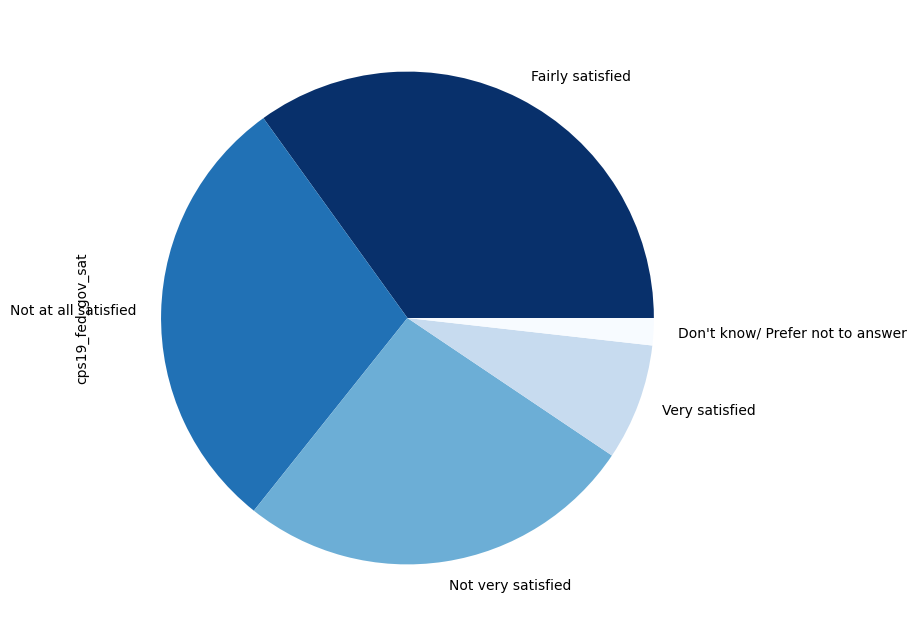

In [97]:
pieGovSat.plot(kind='pie',figsize=(12,8),cmap="Blues_r" )
plt.show()

<AxesSubplot:ylabel='cps19_fed_gov_sat'>

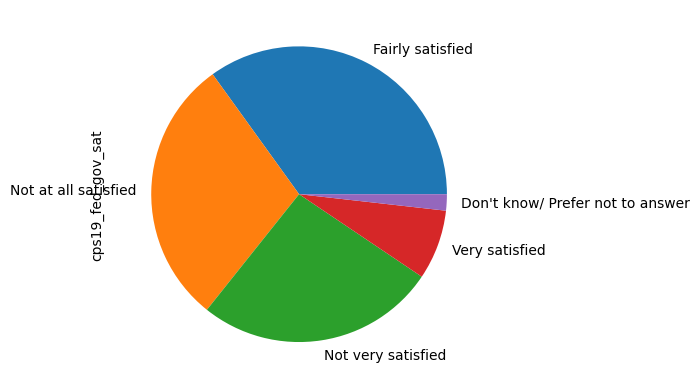

In [21]:
copy_donnees1["cps19_fed_gov_sat"].value_counts(normalize=True).plot(kind='pie')


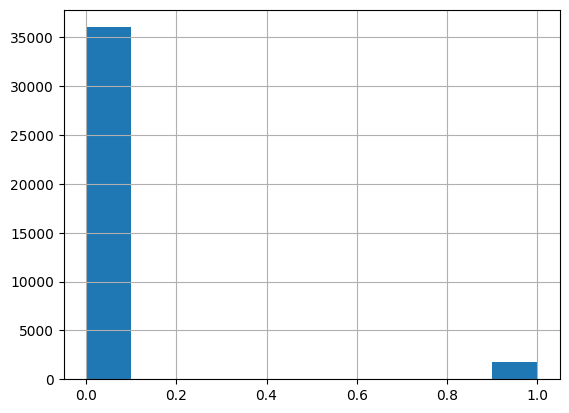

In [22]:
histo5=donnees['cps19_inattentive'].hist()

In [23]:
donnees['cps19_inattentive'].describe()

count    37822.000000
mean         0.047301
std          0.212284
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: cps19_inattentive, dtype: float64

In [24]:
prov = donnees['cps19_province']

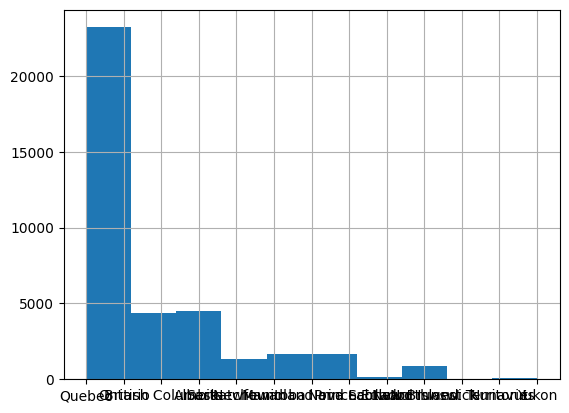

In [25]:
histoprov=prov.hist()

<AxesSubplot:ylabel='cps19_religion'>

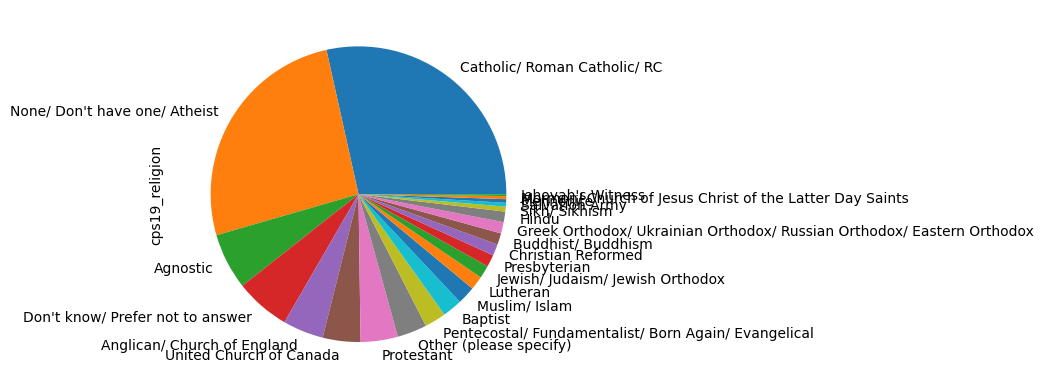

In [26]:
copy_donnees1["cps19_religion"].value_counts(normalize=True).plot(kind='pie')


In [27]:
gender = copy_donnees1['cps19_gender']

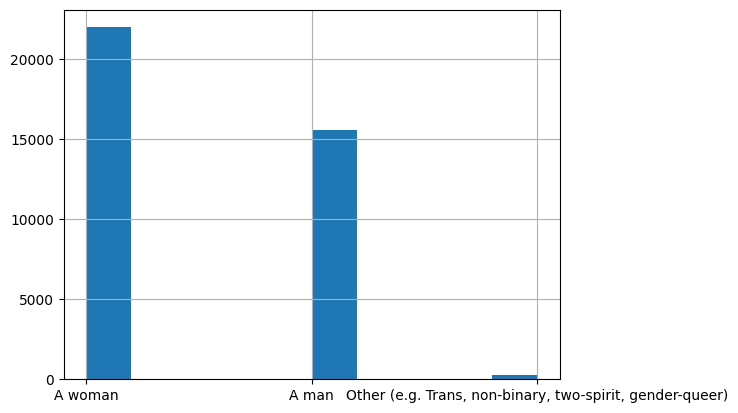

In [28]:
histo2=gender.hist()

<AxesSubplot:ylabel='cps19_gender'>

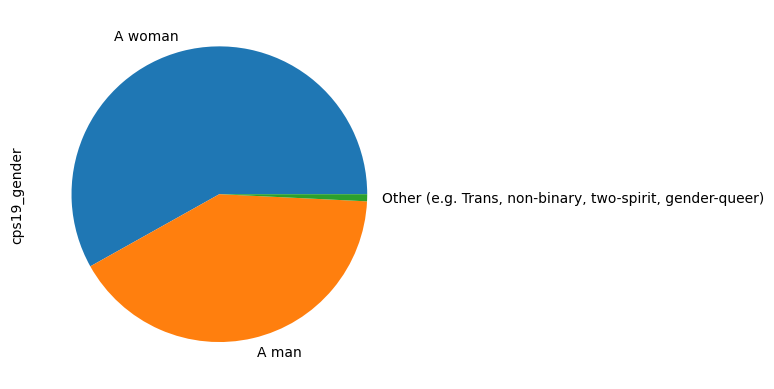

In [29]:
copy_donnees1["cps19_gender"].value_counts(normalize=True).plot(kind='pie')

Text(0.5, 1.0, 'Matrice de corrélation entre les différentes caractéristiques des annonces\n')

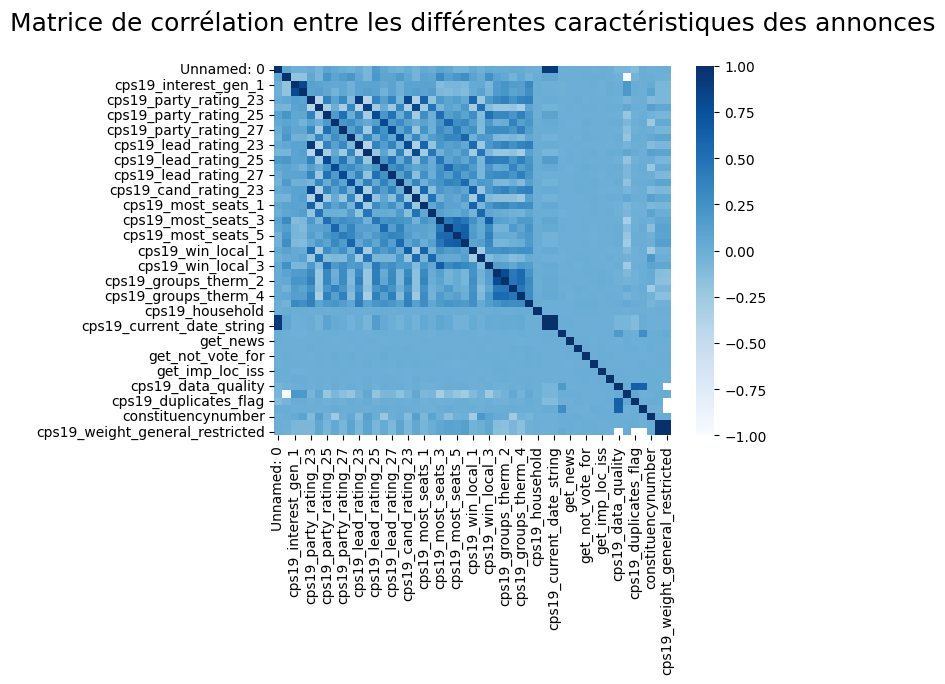

In [30]:
sns.heatmap(copy_donnees1.corr(), annot=False, cmap='Blues')
plt.title("Matrice de corrélation entre les différentes caractéristiques des annonces\n", fontsize=18, color='black')

In [31]:
education = copy_donnees1['cps19_education']

<AxesSubplot:ylabel='cps19_education'>

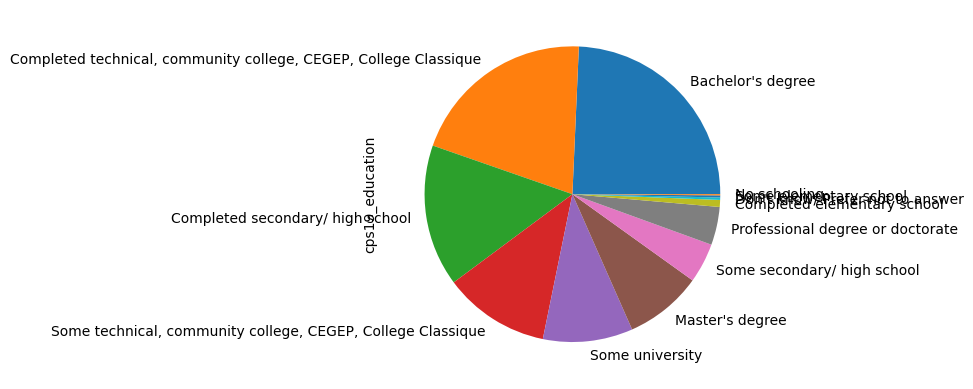

In [32]:
copy_donnees1["cps19_education"].value_counts(normalize=True).plot(kind='pie')


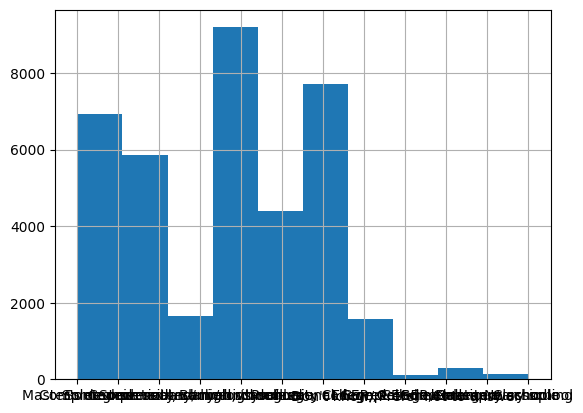

In [33]:
histeduc=education.hist()

In [34]:
copy_donnees1.describe()

,Unnamed: 0,cps19_yob,cps19_interest_gen_1,cps19_interest_elxn_1,cps19_party_rating_23,cps19_party_rating_24,cps19_party_rating_25,cps19_party_rating_26,cps19_party_rating_27,cps19_party_rating_28,...,get_party_issue_handling,get_imp_loc_iss,get_outcome,cps19_data_quality,cps19_age,cps19_duplicates_flag,cps19_inattentive,constituencynumber,cps19_weight_general_all,cps19_weight_general_restricted
count,37822.000000,37822.000000,35409.000000,35536.000000,35176.000000,35022.000000,33962.000000,33916.000000,33136.000000,32725.000000,...,37822.000000,37822.000000,37822.000000,37822.000000,37822.000000,37822.000000,37822.000000,37262.000000,37733.000000,33822.000000
mean,18911.500000,1970.308709,6.453077,7.087292,48.362491,43.611587,50.032860,23.321323,47.459259,25.801008,...,0.500820,0.496140,0.498043,1.315319,48.691291,0.041722,0.047301,36210.215421,1.001669,1.001635
std,10918.415277,16.611707,2.478729,2.475382,33.280149,33.949185,29.395139,27.309832,28.994978,26.548866,...,0.500006,0.499992,0.500003,3.876840,16.611707,0.199955,0.212284,12689.291674,0.549895,0.551240
min,1.000000,1920.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000,0.000000,10001.000000,0.200000,0.200000
25%,9456.250000,1957.000000,5.000000,6.000000,16.000000,10.000000,27.000000,0.000000,23.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,35.000000,0.000000,0.000000,24064.000000,0.644238,0.635656
50%,18911.500000,1970.000000,7.000000,8.000000,54.000000,41.000000,54.000000,12.000000,51.000000,19.000000,...,1.000000,0.000000,0.000000,0.000000,49.000000,0.000000,0.000000,35066.000000,0.838045,0.844196
75%,28366.750000,1984.000000,8.000000,9.000000,77.000000,74.000000,73.000000,40.000000,70.000000,46.000000,...,1.000000,1.000000,1.000000,0.000000,62.000000,0.000000,0.000000,47009.000000,1.200770,1.205593
max,37822.000000,2001.000000,10.000000,10.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,1.000000,1.000000,1.000000,14.000000,99.000000,1.000000,1.000000,62001.000000,5.000000,5.000000


In [35]:
copy_donnees1.drop([ 'cps19_StartDate', 'cps19_EndDate', 'cps19_ResponseId', 'cps19_consent', 'cps19_citizenship',  'cps19_govt_confusing',  'cps19_snclav',  'cps19_union', 'cps19_children', 'cps19_marital', 'cps19_duty_choice' , 'cps19_own_fin_retro' ,  'cps19_current_date_string', 'cps19_Q_Language',  'get_news', 'get_more_naming', 'get_not_vote_for', 'get_party_issue_handling', 'get_imp_loc_iss', 'get_outcome', 'justice_law', 'justice_law_fr', 'lr_scale_order', 'ethnicity_intro', 'ethnicity_intro_fr', 'constituencynumber', 'constituencyname', 
], axis = 1)

,Unnamed: 0,cps19_yob,cps19_gender,cps19_province,cps19_education,cps19_demsat,cps19_imp_iss,cps19_imp_iss_party,cps19_interest_gen_1,cps19_interest_elxn_1,...,pid_en,pid_party_en,pid_party_fr,cps19_data_quality,cps19_panel,cps19_age,cps19_duplicates_flag,cps19_inattentive,cps19_weight_general_all,cps19_weight_general_restricted
0,1,1989,A woman,Quebec,Master's degree,Fairly satisfied,environnement,Green Party,9.0,9.0,...,NaN,NaN,NaN,0,NaN,30,0,0,0.681336,0.673652
1,2,1998,A woman,Quebec,Master's degree,Don't know/ Prefer not to answer,environnement,Green Party,6.0,6.0,...,Green,Green Party,Parti vert,0,NaN,21,0,0,0.681336,0.673652
2,3,2000,A woman,Ontario,Some university,Fairly satisfied,NaN,NaN,8.0,8.0,...,Liberal,Liberal Party,Parti libéral,0,NaN,19,0,0,0.650459,0.635656
3,4,1998,A man,Ontario,Some university,Fairly satisfied,strengthening foreign relations,Conservative Party,8.0,8.0,...,Conservative,Conservative Party,Parti conservateur,0,NaN,21,0,0,0.887253,0.856576
4,5,2000,A woman,Ontario,Completed secondary/ high school,Fairly satisfied,Taxation and Government Spending,Don't know/ Prefer not to answer,8.0,6.0,...,Conservative,Conservative Party,Parti conservateur,0,NaN,19,0,0,1.653808,1.651144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37817,37818,1961,A man,Quebec,Bachelor's degree,Fairly satisfied,Economy,Liberal Party,7.0,7.0,...,Liberal,Liberal Party,Parti lib<e9>ral,0,cps19_r,58,0,0,0.745574,0.740583
37818,37819,1991,A man,Ontario,Bachelor's degree,Not very satisfied,environmentally sustainable ecenomics,Green Party,8.0,8.0,...,Green,Green Party,Parti vert,12,cps19_cintid,28,0,1,0.887253,NaN
37819,37820,1969,A woman,Saskatchewan,"Some technical, community college, CEGEP, Coll...",Fairly satisfied,Honor of the Treaties and clean environment,ndp,10.0,10.0,...,NDP,NDP,NPD,0,cps19_rid,50,0,0,0.689530,0.699415
37820,37821,1983,A man,Ontario,"Some technical, community college, CEGEP, Coll...",Very satisfied,responsible use of taxpayer revenue,ndp,8.0,8.0,...,Liberal,Liberal Party,Parti lib<e9>ral,0,cps19_id,36,0,0,1.254407,1.256288


In [36]:
len(copy_donnees1.columns)

111

In [37]:
reponse = 0
attributsgardes2 = {}
attributsrejetes2 = {}
for column in copy_donnees1:
    if copy_donnees1[column].isna().sum()== 0 :
        attributsgardes2.update({column:copy_donnees1[column].isna().sum()})  
    else:   
            attributsrejetes2.update({column:copy_donnees1[column].isna().sum()})
print(reponse)
            

0


In [38]:
print(attributsgardes2)

{'Unnamed: 0': 0, 'cps19_StartDate': 0, 'cps19_EndDate': 0, 'cps19_ResponseId': 0, 'cps19_consent': 0, 'cps19_citizenship': 0, 'cps19_yob': 0, 'cps19_gender': 0, 'cps19_province': 0, 'cps19_education': 0, 'cps19_demsat': 0, 'cps19_fed_gov_sat': 0, 'cps19_spend_educ': 0, 'cps19_spend_env': 0, 'cps19_spend_just_law': 0, 'cps19_spend_defence': 0, 'cps19_spend_imm_min': 0, 'cps19_econ_retro': 0, 'cps19_econ_fed': 0, 'cps19_ownfinanc_fed': 0, 'cps19_imm': 0, 'cps19_refugees': 0, 'cps19_govt_confusing': 0, 'cps19_govt_say': 0, 'cps19_pol_eth': 0, 'cps19_lib_promises': 0, 'cps19_snclav': 0, 'cps19_volunteer': 0, 'cps19_duty_choice': 0, 'cps19_own_fin_retro': 0, 'cps19_prov_gov_sat': 0, 'cps19_fed_id': 0, 'cps19_fed_donate': 0, 'cps19_religion': 0, 'cps19_bornin_canada': 0, 'cps19_sexuality': 0, 'cps19_employment': 0, 'cps19_union': 0, 'cps19_children': 0, 'cps19_marital': 0, 'cps19_current_date': 0, 'cps19_current_date_string': 0, 'cps19_Q_Language': 0, 'cps19_Q_TotalDuration': 0, 'get_news':

In [39]:
len(copy_donnees1.columns)

111

Text(0.5, 1.0, 'Matrice de corrélation entre les différentes caractéristiques des annonces\n')

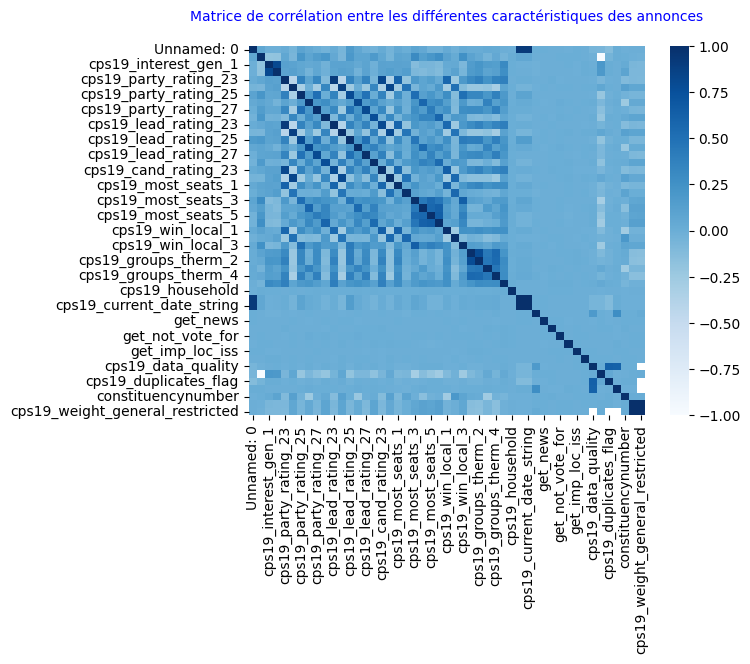

In [40]:
sns.heatmap(copy_donnees1.corr(), annot=False, cmap='Blues')
plt.title("Matrice de corrélation entre les différentes caractéristiques des annonces\n", fontsize=10, color='blue')

In [41]:
elec_df = copy_donnees1[['Unnamed: 0','cps19_age', 'cps19_gender', 'cps19_education','cps19_imp_iss_party', 'cps19_votechoice', 'cps19_party_rating_23', 'cps19_party_rating_24', 'cps19_party_rating_25', 'cps19_party_rating_26', 'cps19_party_rating_27', 'cps19_party_rating_28', 'cps19_fed_id', 'cps19_vote_2015'
]]



In [42]:
copy_donnees1


,Unnamed: 0,cps19_StartDate,cps19_EndDate,cps19_ResponseId,cps19_consent,cps19_citizenship,cps19_yob,cps19_gender,cps19_province,cps19_education,...,pid_party_fr,cps19_data_quality,cps19_panel,cps19_age,cps19_duplicates_flag,cps19_inattentive,constituencynumber,constituencyname,cps19_weight_general_all,cps19_weight_general_restricted
0,1,2019-09-13 04:09:44,2019-09-13 04:36:19,R_1OpYXEFGzHRUpjM,I consent to participate in this study. I have...,Canadian citizen,1989,A woman,Quebec,Master's degree,...,NaN,0,NaN,30,0,0,24039.0,Laurier—Sainte-Marie,0.681336,0.673652
1,2,2019-09-13 04:39:09,2019-09-13 04:57:06,R_2qdrL3J618rxYW0,I consent to participate in this study. I have...,Canadian citizen,1998,A woman,Quebec,Master's degree,...,Parti vert,0,NaN,21,0,0,24039.0,Laurier—Sainte-Marie,0.681336,0.673652
2,3,2019-09-13 06:01:19,2019-09-13 06:27:29,R_USWDAPcQEQiMmNb,I consent to participate in this study. I have...,Canadian citizen,2000,A woman,Ontario,Some university,...,Parti libéral,0,NaN,19,0,0,35095.0,Scarborough—Guildwood,0.650459,0.635656
3,4,2019-09-13 06:05:37,2019-09-13 06:50:53,R_3IQaeDXy0tBzEry,I consent to participate in this study. I have...,Canadian citizen,1998,A man,Ontario,Some university,...,Parti conservateur,0,NaN,21,0,0,35104.0,Thornhill,0.887253,0.856576
4,5,2019-09-13 06:05:52,2019-09-13 06:32:53,R_27WeMQ1asip2cMD,I consent to participate in this study. I have...,Canadian citizen,2000,A woman,Ontario,Completed secondary/ high school,...,Parti conservateur,0,NaN,19,0,0,35104.0,Thornhill,1.653808,1.651144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37817,37818,2019-10-21 03:00:16,2019-10-21 03:19:19,R_3oQICUsIyPYiuPS,I consent to participate in this study. I have...,Canadian citizen,1961,A man,Quebec,Bachelor's degree,...,Parti lib<e9>ral,0,cps19_r,58,0,0,24056.0,Pierrefonds—Dollard,0.745574,0.740583
37818,37819,2019-10-21 03:42:56,2019-10-21 04:54:08,R_1mnjkphmpoqw5Pz,I consent to participate in this study. I have...,Canadian citizen,1991,A man,Ontario,Bachelor's degree,...,Parti vert,12,cps19_cintid,28,0,1,35024.0,Eglinton—Lawrence,0.887253,NaN
37819,37820,2019-10-21 04:31:22,2019-10-21 04:50:44,R_3lAD7fCxbFns4CW,I consent to participate in this study. I have...,Canadian citizen,1969,A woman,Saskatchewan,"Some technical, community college, CEGEP, Coll...",...,NPD,0,cps19_rid,50,0,0,47008.0,Regina—Qu'Appelle,0.689530,0.699415
37820,37821,2019-10-21 04:31:47,2019-10-21 04:56:06,R_1F3PFOFCfQcvPhj,I consent to participate in this study. I have...,Canadian citizen,1983,A man,Ontario,"Some technical, community college, CEGEP, Coll...",...,Parti lib<e9>ral,0,cps19_id,36,0,0,35113.0,Wellington—Halton Hills,1.254407,1.256288


In [43]:
nvjeudonnees = copy_donnees1.copy()

In [44]:
new_df = nvjeudonnees[['Unnamed: 0','cps19_yob', 'cps19_gender', 'cps19_province', 'cps19_education', 'cps19_imp_iss_party', 'cps19_votechoice', 'cps19_fed_gov_sat', 'cps19_party_rating_23', 'cps19_party_rating_24', 'cps19_party_rating_25', 'cps19_party_rating_26', 'cps19_party_rating_27', 'cps19_party_rating_28', 'cps19_lead_rating_23', 'cps19_lead_rating_24', 'cps19_lead_rating_25', 'cps19_lead_rating_26', 'cps19_lead_rating_27', 'cps19_lead_rating_28', 'cps19_imm', 'cps19_fed_id', 'cps19_vote_2015', 'cps19_religion', 'cps19_bornin_canada', 'premier', 'pid_en', 'pid_party_en', 'pid_party_fr'
]]



In [45]:
len(new_df.columns)

29

In [46]:
elec_array=new_df.values

In [47]:
elec_array

array([[1, 1989, 'A woman', ..., nan, nan, nan],
       [2, 1998, 'A woman', ..., 'Green', 'Green Party', 'Parti vert'],
       [3, 2000, 'A woman', ..., 'Liberal', 'Liberal Party',
        'Parti libéral'],
       ...,
       [37820, 1969, 'A woman', ..., 'NDP', 'NDP', 'NPD'],
       [37821, 1983, 'A man', ..., 'Liberal', 'Liberal Party',
        'Parti lib<e9>ral'],
       [37822, 1977, 'A man', ..., 'Liberal', 'Liberal Party',
        'Parti lib<e9>ral']], dtype=object)

In [48]:
new_df

,Unnamed: 0,cps19_yob,cps19_gender,cps19_province,cps19_education,cps19_imp_iss_party,cps19_votechoice,cps19_fed_gov_sat,cps19_party_rating_23,cps19_party_rating_24,...,cps19_lead_rating_28,cps19_imm,cps19_fed_id,cps19_vote_2015,cps19_religion,cps19_bornin_canada,premier,pid_en,pid_party_en,pid_party_fr
0,1,1989,A woman,Quebec,Master's degree,Green Party,Green Party,Not very satisfied,52.0,0.0,...,0.0,More immigrants,Don't know/ Prefer not to answer,NaN,Don't know/ Prefer not to answer,Don't know/ Prefer not to say,François Legault,NaN,NaN,NaN
1,2,1998,A woman,Quebec,Master's degree,Green Party,Don't know/ Prefer not to answer,Not very satisfied,51.0,0.0,...,0.0,About the same number of immigrants as now,Green,Green Party,Catholic/ Roman Catholic/ RC,Yes,François Legault,Green,Green Party,Parti vert
2,3,2000,A woman,Ontario,Some university,NaN,Liberal Party,Fairly satisfied,52.0,49.0,...,20.0,About the same number of immigrants as now,Liberal,NaN,Catholic/ Roman Catholic/ RC,Yes,Doug Ford,Liberal,Liberal Party,Parti libéral
3,4,1998,A man,Ontario,Some university,Conservative Party,Conservative Party,Not very satisfied,30.0,85.0,...,10.0,About the same number of immigrants as now,Conservative,NaN,Jewish/ Judaism/ Jewish Orthodox,Yes,Doug Ford,Conservative,Conservative Party,Parti conservateur
4,5,2000,A woman,Ontario,Completed secondary/ high school,Don't know/ Prefer not to answer,Don't know/ Prefer not to answer,Not very satisfied,20.0,62.0,...,30.0,More immigrants,Conservative,NaN,Catholic/ Roman Catholic/ RC,Yes,Doug Ford,Conservative,Conservative Party,Parti conservateur
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37817,37818,1961,A man,Quebec,Bachelor's degree,Liberal Party,Liberal Party,Fairly satisfied,83.0,16.0,...,0.0,More immigrants,Liberal,Liberal Party,None/ Don't have one/ Atheist,Yes,Fran<e7>ois Legault,Liberal,Liberal Party,Parti lib<e9>ral
37818,37819,1991,A man,Ontario,Bachelor's degree,Green Party,Green Party,Not very satisfied,40.0,65.0,...,55.0,Fewer immigrants,Green,Green Party,Catholic/ Roman Catholic/ RC,Yes,Doug Ford,Green,Green Party,Parti vert
37819,37820,1969,A woman,Saskatchewan,"Some technical, community college, CEGEP, Coll...",ndp,NaN,Not very satisfied,0.0,0.0,...,0.0,About the same number of immigrants as now,ndp,ndp,Other (please specify),Yes,Scott Moe,NDP,NDP,NPD
37820,37821,1983,A man,Ontario,"Some technical, community college, CEGEP, Coll...",ndp,NaN,Fairly satisfied,70.0,0.0,...,0.0,Fewer immigrants,Liberal,Liberal Party,Catholic/ Roman Catholic/ RC,Yes,Doug Ford,Liberal,Liberal Party,Parti lib<e9>ral


In [49]:
new_df.isnull().sum()

Unnamed: 0                  0
cps19_yob                   0
cps19_gender                0
cps19_province              0
cps19_education             0
cps19_imp_iss_party      7422
cps19_votechoice         9401
cps19_fed_gov_sat           0
cps19_party_rating_23    2646
cps19_party_rating_24    2800
cps19_party_rating_25    3860
cps19_party_rating_26    3906
cps19_party_rating_27    4686
cps19_party_rating_28    5097
cps19_lead_rating_23     2416
cps19_lead_rating_24     3768
cps19_lead_rating_25     4512
cps19_lead_rating_26     5924
cps19_lead_rating_27     5595
cps19_lead_rating_28     5404
cps19_imm                   0
cps19_fed_id                0
cps19_vote_2015          7878
cps19_religion              0
cps19_bornin_canada         0
premier                     0
pid_en                   6532
pid_party_en             6532
pid_party_fr             6532
dtype: int64

In [50]:
#new_df = new_df.fillna(new_df.mean())
# resoudreprobleme car valeurs NaN

In [51]:
from sklearn.impute import SimpleImputer

In [52]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
#>>> imp.fit(new_df.iloc[:,[0,1,8,9,10,11,12,13,14,15,16,17,18,19]])
#SimpleImputer()



In [53]:
num = [col for col in new_df.columns if new_df[col].dtypes != 'O']

In [54]:
num

['Unnamed: 0',
 'cps19_yob',
 'cps19_party_rating_23',
 'cps19_party_rating_24',
 'cps19_party_rating_25',
 'cps19_party_rating_26',
 'cps19_party_rating_27',
 'cps19_party_rating_28',
 'cps19_lead_rating_23',
 'cps19_lead_rating_24',
 'cps19_lead_rating_25',
 'cps19_lead_rating_26',
 'cps19_lead_rating_27',
 'cps19_lead_rating_28']

In [55]:
imputer.fit(new_df[num])

SimpleImputer()

In [56]:
imputer.transform(new_df[num])

array([[1.00000000e+00, 1.98900000e+03, 5.20000000e+01, ...,
        1.50000000e+01, 8.00000000e+01, 0.00000000e+00],
       [2.00000000e+00, 1.99800000e+03, 5.10000000e+01, ...,
        3.20000000e+01, 5.90000000e+01, 0.00000000e+00],
       [3.00000000e+00, 2.00000000e+03, 5.20000000e+01, ...,
        2.77813656e+01, 5.60000000e+01, 2.00000000e+01],
       ...,
       [3.78200000e+04, 1.96900000e+03, 0.00000000e+00, ...,
        0.00000000e+00, 7.00000000e+01, 0.00000000e+00],
       [3.78210000e+04, 1.98300000e+03, 7.00000000e+01, ...,
        5.50000000e+01, 7.50000000e+01, 0.00000000e+00],
       [3.78220000e+04, 1.97700000e+03, 4.83624915e+01, ...,
        2.77813656e+01, 4.68612964e+01, 2.61325498e+01]])

In [57]:
pd.DataFrame(imputer.transform(new_df[num]))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.0,1989.0,52.000000,0.000000,64.00000,23.321323,97.000000,0.000000,55.0,0.000000,71.00000,15.000000,80.000000,0.00000
1,2.0,1998.0,51.000000,0.000000,64.00000,40.000000,88.000000,0.000000,53.0,0.000000,50.37193,32.000000,59.000000,0.00000
2,3.0,2000.0,52.000000,49.000000,50.03286,23.321323,47.459259,25.801008,74.0,24.000000,63.00000,27.781366,56.000000,20.00000
3,4.0,1998.0,30.000000,85.000000,0.00000,0.000000,0.000000,30.000000,0.0,80.000000,0.00000,0.000000,0.000000,10.00000
4,5.0,2000.0,20.000000,62.000000,51.00000,20.000000,50.000000,20.000000,30.0,60.000000,50.37193,50.000000,60.000000,30.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37817,37818.0,1961.0,83.000000,16.000000,64.00000,70.000000,69.000000,40.000000,87.0,16.000000,75.00000,74.000000,62.000000,0.00000
37818,37819.0,1991.0,40.000000,65.000000,0.00000,50.000000,85.000000,60.000000,27.0,55.000000,0.00000,50.000000,95.000000,55.00000
37819,37820.0,1969.0,0.000000,0.000000,100.00000,0.000000,68.000000,0.000000,0.0,0.000000,100.00000,0.000000,70.000000,0.00000
37820,37821.0,1983.0,70.000000,0.000000,99.00000,1.000000,72.000000,1.000000,78.0,0.000000,100.00000,55.000000,75.000000,0.00000


Les 6 premières colonnes sont les données qui ont été transformées et les 6 dernières des indicateurs pour savoir quelle colonne a été modifiée 

In [59]:
pd.DataFrame(imputer.transform(new_df[num])).isnull().sum().sum()

0

In [61]:
new_df.head()

,Unnamed: 0,cps19_yob,cps19_gender,cps19_province,cps19_education,cps19_imp_iss_party,cps19_votechoice,cps19_fed_gov_sat,cps19_party_rating_23,cps19_party_rating_24,...,cps19_lead_rating_28,cps19_imm,cps19_fed_id,cps19_vote_2015,cps19_religion,cps19_bornin_canada,premier,pid_en,pid_party_en,pid_party_fr
0,1,1989,A woman,Quebec,Master's degree,Green Party,Green Party,Not very satisfied,52.0,0.0,...,0.0,More immigrants,Don't know/ Prefer not to answer,NaN,Don't know/ Prefer not to answer,Don't know/ Prefer not to say,François Legault,NaN,NaN,NaN
1,2,1998,A woman,Quebec,Master's degree,Green Party,Don't know/ Prefer not to answer,Not very satisfied,51.0,0.0,...,0.0,About the same number of immigrants as now,Green,Green Party,Catholic/ Roman Catholic/ RC,Yes,François Legault,Green,Green Party,Parti vert
2,3,2000,A woman,Ontario,Some university,NaN,Liberal Party,Fairly satisfied,52.0,49.0,...,20.0,About the same number of immigrants as now,Liberal,NaN,Catholic/ Roman Catholic/ RC,Yes,Doug Ford,Liberal,Liberal Party,Parti libéral
3,4,1998,A man,Ontario,Some university,Conservative Party,Conservative Party,Not very satisfied,30.0,85.0,...,10.0,About the same number of immigrants as now,Conservative,NaN,Jewish/ Judaism/ Jewish Orthodox,Yes,Doug Ford,Conservative,Conservative Party,Parti conservateur
4,5,2000,A woman,Ontario,Completed secondary/ high school,Don't know/ Prefer not to answer,Don't know/ Prefer not to answer,Not very satisfied,20.0,62.0,...,30.0,More immigrants,Conservative,NaN,Catholic/ Roman Catholic/ RC,Yes,Doug Ford,Conservative,Conservative Party,Parti conservateur


In [62]:
new_df.isnull().sum()

Unnamed: 0                  0
cps19_yob                   0
cps19_gender                0
cps19_province              0
cps19_education             0
cps19_imp_iss_party      7422
cps19_votechoice         9401
cps19_fed_gov_sat           0
cps19_party_rating_23    2646
cps19_party_rating_24    2800
cps19_party_rating_25    3860
cps19_party_rating_26    3906
cps19_party_rating_27    4686
cps19_party_rating_28    5097
cps19_lead_rating_23     2416
cps19_lead_rating_24     3768
cps19_lead_rating_25     4512
cps19_lead_rating_26     5924
cps19_lead_rating_27     5595
cps19_lead_rating_28     5404
cps19_imm                   0
cps19_fed_id                0
cps19_vote_2015          7878
cps19_religion              0
cps19_bornin_canada         0
premier                     0
pid_en                   6532
pid_party_en             6532
pid_party_fr             6532
dtype: int64

In [63]:
new_df[num].isnull().sum().sum()

50614

In [64]:
elec_df = pd.DataFrame(imputer.transform(new_df[num]))

In [67]:
elec_df = pd.DataFrame(data=elec_df.values, columns=new_df[num].columns)

In [68]:
elec_df[num].isnull().sum().sum()

0

In [69]:
elec_df.head()

,Unnamed: 0,cps19_yob,cps19_party_rating_23,cps19_party_rating_24,cps19_party_rating_25,cps19_party_rating_26,cps19_party_rating_27,cps19_party_rating_28,cps19_lead_rating_23,cps19_lead_rating_24,cps19_lead_rating_25,cps19_lead_rating_26,cps19_lead_rating_27,cps19_lead_rating_28
0,1.0,1989.0,52.0,0.0,64.00000,23.321323,97.000000,0.000000,55.0,0.0,71.00000,15.000000,80.0,0.0
1,2.0,1998.0,51.0,0.0,64.00000,40.000000,88.000000,0.000000,53.0,0.0,50.37193,32.000000,59.0,0.0
2,3.0,2000.0,52.0,49.0,50.03286,23.321323,47.459259,25.801008,74.0,24.0,63.00000,27.781366,56.0,20.0
3,4.0,1998.0,30.0,85.0,0.00000,0.000000,0.000000,30.000000,0.0,80.0,0.00000,0.000000,0.0,10.0
4,5.0,2000.0,20.0,62.0,51.00000,20.000000,50.000000,20.000000,30.0,60.0,50.37193,50.000000,60.0,30.0


In [71]:
obj = [col for col in new_df.columns if new_df[col].dtypes == 'O']

In [72]:
obj

['cps19_gender',
 'cps19_province',
 'cps19_education',
 'cps19_imp_iss_party',
 'cps19_votechoice',
 'cps19_fed_gov_sat',
 'cps19_imm',
 'cps19_fed_id',
 'cps19_vote_2015',
 'cps19_religion',
 'cps19_bornin_canada',
 'premier',
 'pid_en',
 'pid_party_en',
 'pid_party_fr']

In [73]:
new_df[obj]

,cps19_gender,cps19_province,cps19_education,cps19_imp_iss_party,cps19_votechoice,cps19_fed_gov_sat,cps19_imm,cps19_fed_id,cps19_vote_2015,cps19_religion,cps19_bornin_canada,premier,pid_en,pid_party_en,pid_party_fr
0,A woman,Quebec,Master's degree,Green Party,Green Party,Not very satisfied,More immigrants,Don't know/ Prefer not to answer,NaN,Don't know/ Prefer not to answer,Don't know/ Prefer not to say,François Legault,NaN,NaN,NaN
1,A woman,Quebec,Master's degree,Green Party,Don't know/ Prefer not to answer,Not very satisfied,About the same number of immigrants as now,Green,Green Party,Catholic/ Roman Catholic/ RC,Yes,François Legault,Green,Green Party,Parti vert
2,A woman,Ontario,Some university,NaN,Liberal Party,Fairly satisfied,About the same number of immigrants as now,Liberal,NaN,Catholic/ Roman Catholic/ RC,Yes,Doug Ford,Liberal,Liberal Party,Parti libéral
3,A man,Ontario,Some university,Conservative Party,Conservative Party,Not very satisfied,About the same number of immigrants as now,Conservative,NaN,Jewish/ Judaism/ Jewish Orthodox,Yes,Doug Ford,Conservative,Conservative Party,Parti conservateur
4,A woman,Ontario,Completed secondary/ high school,Don't know/ Prefer not to answer,Don't know/ Prefer not to answer,Not very satisfied,More immigrants,Conservative,NaN,Catholic/ Roman Catholic/ RC,Yes,Doug Ford,Conservative,Conservative Party,Parti conservateur
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37817,A man,Quebec,Bachelor's degree,Liberal Party,Liberal Party,Fairly satisfied,More immigrants,Liberal,Liberal Party,None/ Don't have one/ Atheist,Yes,Fran<e7>ois Legault,Liberal,Liberal Party,Parti lib<e9>ral
37818,A man,Ontario,Bachelor's degree,Green Party,Green Party,Not very satisfied,Fewer immigrants,Green,Green Party,Catholic/ Roman Catholic/ RC,Yes,Doug Ford,Green,Green Party,Parti vert
37819,A woman,Saskatchewan,"Some technical, community college, CEGEP, Coll...",ndp,NaN,Not very satisfied,About the same number of immigrants as now,ndp,ndp,Other (please specify),Yes,Scott Moe,NDP,NDP,NPD
37820,A man,Ontario,"Some technical, community college, CEGEP, Coll...",ndp,NaN,Fairly satisfied,Fewer immigrants,Liberal,Liberal Party,Catholic/ Roman Catholic/ RC,Yes,Doug Ford,Liberal,Liberal Party,Parti lib<e9>ral


In [74]:
elec_df =  pd.concat([elec_df, new_df[obj]], axis=1)

In [76]:
elec_df.head()

,Unnamed: 0,cps19_yob,cps19_party_rating_23,cps19_party_rating_24,cps19_party_rating_25,cps19_party_rating_26,cps19_party_rating_27,cps19_party_rating_28,cps19_lead_rating_23,cps19_lead_rating_24,...,cps19_fed_gov_sat,cps19_imm,cps19_fed_id,cps19_vote_2015,cps19_religion,cps19_bornin_canada,premier,pid_en,pid_party_en,pid_party_fr
0,1.0,1989.0,52.0,0.0,64.00000,23.321323,97.000000,0.000000,55.0,0.0,...,Not very satisfied,More immigrants,Don't know/ Prefer not to answer,NaN,Don't know/ Prefer not to answer,Don't know/ Prefer not to say,François Legault,NaN,NaN,NaN
1,2.0,1998.0,51.0,0.0,64.00000,40.000000,88.000000,0.000000,53.0,0.0,...,Not very satisfied,About the same number of immigrants as now,Green,Green Party,Catholic/ Roman Catholic/ RC,Yes,François Legault,Green,Green Party,Parti vert
2,3.0,2000.0,52.0,49.0,50.03286,23.321323,47.459259,25.801008,74.0,24.0,...,Fairly satisfied,About the same number of immigrants as now,Liberal,NaN,Catholic/ Roman Catholic/ RC,Yes,Doug Ford,Liberal,Liberal Party,Parti libéral
3,4.0,1998.0,30.0,85.0,0.00000,0.000000,0.000000,30.000000,0.0,80.0,...,Not very satisfied,About the same number of immigrants as now,Conservative,NaN,Jewish/ Judaism/ Jewish Orthodox,Yes,Doug Ford,Conservative,Conservative Party,Parti conservateur
4,5.0,2000.0,20.0,62.0,51.00000,20.000000,50.000000,20.000000,30.0,60.0,...,Not very satisfied,More immigrants,Conservative,NaN,Catholic/ Roman Catholic/ RC,Yes,Doug Ford,Conservative,Conservative Party,Parti conservateur


In [78]:
elec_df.isnull().sum().sum()

44297

In [79]:
elec_df = elec_df.fillna('unknown')

In [81]:
elec_df.isnull().sum().sum()

0

In [82]:
elec_df

,Unnamed: 0,cps19_yob,cps19_party_rating_23,cps19_party_rating_24,cps19_party_rating_25,cps19_party_rating_26,cps19_party_rating_27,cps19_party_rating_28,cps19_lead_rating_23,cps19_lead_rating_24,...,cps19_fed_gov_sat,cps19_imm,cps19_fed_id,cps19_vote_2015,cps19_religion,cps19_bornin_canada,premier,pid_en,pid_party_en,pid_party_fr
0,1.0,1989.0,52.000000,0.000000,64.00000,23.321323,97.000000,0.000000,55.0,0.000000,...,Not very satisfied,More immigrants,Don't know/ Prefer not to answer,unknown,Don't know/ Prefer not to answer,Don't know/ Prefer not to say,François Legault,unknown,unknown,unknown
1,2.0,1998.0,51.000000,0.000000,64.00000,40.000000,88.000000,0.000000,53.0,0.000000,...,Not very satisfied,About the same number of immigrants as now,Green,Green Party,Catholic/ Roman Catholic/ RC,Yes,François Legault,Green,Green Party,Parti vert
2,3.0,2000.0,52.000000,49.000000,50.03286,23.321323,47.459259,25.801008,74.0,24.000000,...,Fairly satisfied,About the same number of immigrants as now,Liberal,unknown,Catholic/ Roman Catholic/ RC,Yes,Doug Ford,Liberal,Liberal Party,Parti libéral
3,4.0,1998.0,30.000000,85.000000,0.00000,0.000000,0.000000,30.000000,0.0,80.000000,...,Not very satisfied,About the same number of immigrants as now,Conservative,unknown,Jewish/ Judaism/ Jewish Orthodox,Yes,Doug Ford,Conservative,Conservative Party,Parti conservateur
4,5.0,2000.0,20.000000,62.000000,51.00000,20.000000,50.000000,20.000000,30.0,60.000000,...,Not very satisfied,More immigrants,Conservative,unknown,Catholic/ Roman Catholic/ RC,Yes,Doug Ford,Conservative,Conservative Party,Parti conservateur
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37817,37818.0,1961.0,83.000000,16.000000,64.00000,70.000000,69.000000,40.000000,87.0,16.000000,...,Fairly satisfied,More immigrants,Liberal,Liberal Party,None/ Don't have one/ Atheist,Yes,Fran<e7>ois Legault,Liberal,Liberal Party,Parti lib<e9>ral
37818,37819.0,1991.0,40.000000,65.000000,0.00000,50.000000,85.000000,60.000000,27.0,55.000000,...,Not very satisfied,Fewer immigrants,Green,Green Party,Catholic/ Roman Catholic/ RC,Yes,Doug Ford,Green,Green Party,Parti vert
37819,37820.0,1969.0,0.000000,0.000000,100.00000,0.000000,68.000000,0.000000,0.0,0.000000,...,Not very satisfied,About the same number of immigrants as now,ndp,ndp,Other (please specify),Yes,Scott Moe,NDP,NDP,NPD
37820,37821.0,1983.0,70.000000,0.000000,99.00000,1.000000,72.000000,1.000000,78.0,0.000000,...,Fairly satisfied,Fewer immigrants,Liberal,Liberal Party,Catholic/ Roman Catholic/ RC,Yes,Doug Ford,Liberal,Liberal Party,Parti lib<e9>ral
